In [24]:
%pip install seaborn
import pandas as pd
import numpy as np
import matplotlib
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [26]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<Axes: xlabel='R&D Spend', ylabel='Profit'>

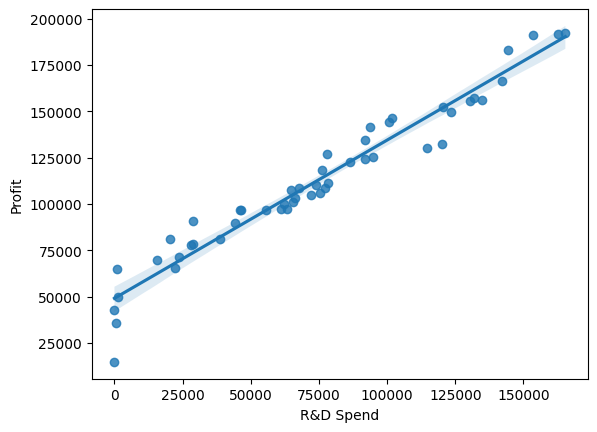

In [27]:
sns.regplot(x='R&D Spend', y='Profit', data=df)

<Axes: xlabel='Administration', ylabel='Profit'>

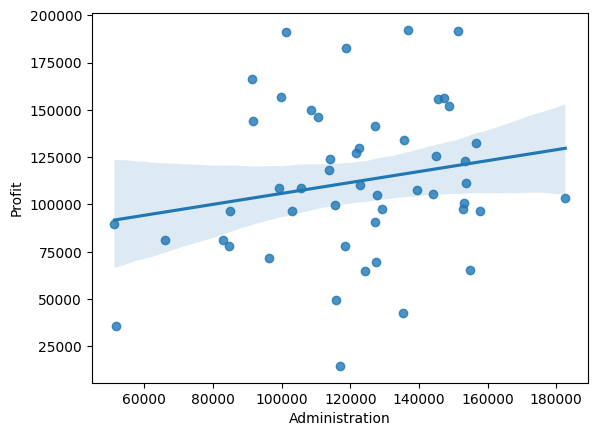

In [28]:
sns.regplot(x='Administration', y='Profit', data=df)

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

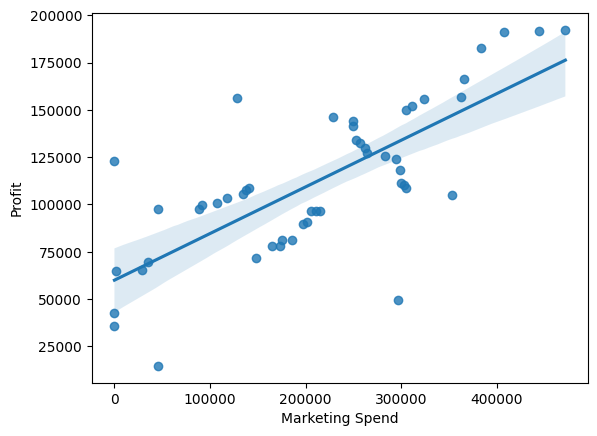

In [29]:
sns.regplot(x='Marketing Spend', y='Profit', data=df)

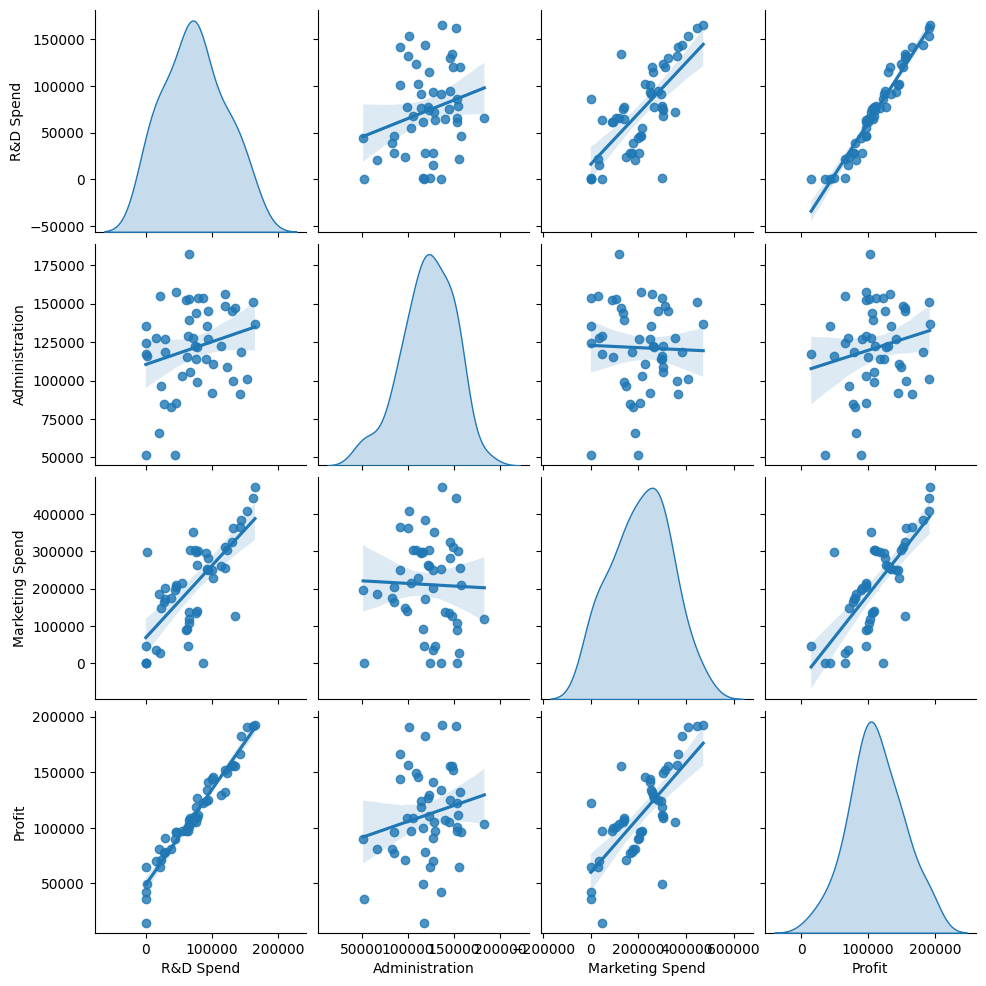

In [30]:
sns.pairplot(df, kind='reg', diag_kind='kde')

<Axes: xlabel='State', ylabel='Profit'>

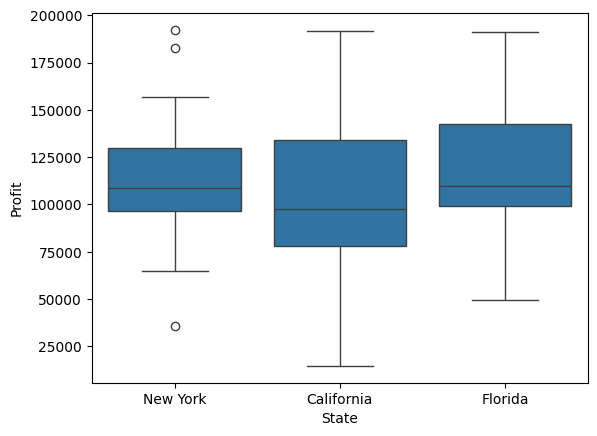

In [31]:
sns.boxplot(x='State', y='Profit', data=df)

In [32]:
#Feature Selections
x = df.drop(columns=['Profit'])
y = df['Profit']

In [33]:
print(x)

    R&D Spend  Administration  Marketing Spend       State
0   165349.20       136897.80        471784.10    New York
1   162597.70       151377.59        443898.53  California
2   153441.51       101145.55        407934.54     Florida
3   144372.41       118671.85        383199.62    New York
4   142107.34        91391.77        366168.42     Florida
5   131876.90        99814.71        362861.36    New York
6   134615.46       147198.87        127716.82  California
7   130298.13       145530.06        323876.68     Florida
8   120542.52       148718.95        311613.29    New York
9   123334.88       108679.17        304981.62  California
10  101913.08       110594.11        229160.95     Florida
11  100671.96        91790.61        249744.55  California
12   93863.75       127320.38        249839.44     Florida
13   91992.39       135495.07        252664.93  California
14  119943.24       156547.42        256512.92     Florida
15  114523.61       122616.84        261776.23    New Yo

In [34]:
print(y)

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64


In [35]:
#Train-Test split
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

Column Selection

In [36]:
cat_cols = x.select_dtypes(include=['object']).columns
num_cols = x.select_dtypes(include=['number']).columns

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
#Columns Transformer is used to apply different transformations to different columns of the dataframe 
#FIT_TRANSFORM is used to fit and transform the data in one step

Pipeline

In [38]:
X = df.drop(columns=['Profit'])
Y = df['Profit']


In [39]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
cat_pipe = Pipeline(
    steps=[
        ('onehot', OneHotEncoder(drop='first'))
    ] 
)

In [41]:
num_pipe = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

In [42]:
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['number']).columns

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_pipe, cat_cols),
    ('num', num_pipe, num_cols)
])

In [43]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [44]:
model.fit(Xtrain, ytrain)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [45]:
import os
from joblib import dump, load

os.makedirs('models', exist_ok=True)
with open('models/MultipleLinearRegressionModel.pkl', 'wb') as f:
    dump(model, f)
    print("Model dumped!")

Model dumped!


In [46]:
%pip install gradio
import gradio as gr
import pandas as pd

def prediction(rnd, admin, marketing, state):
    # make a single record dataframe
    df = pd.DataFrame({'R&D Spend': [rnd],
                       'Administration': [admin],
                       'Marketing Spend': [marketing],
                       'State': [state]})
    # load joblib model
    with open('models/MultipleLinearRegressionModel.pkl', 'rb') as f:
        model = load(f)
    # Predict the profit
    profit = model.predict(df)  # return numpy array
    return profit[0]

ui = gr.Interface(
    fn = prediction,
    inputs = ['number', 'number', 'number','text'],
    outputs = gr.Text(),
    title = "Multiple Linear Regression Model",
    examples = [[165349.2, 136897.8, 471784.1, 'New York'],
                [162597.7, 151377.59, 443898.53, 'California']],
)
ui.launch()              


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
